# simple graphs

In [1]:
# import modules
import networkx as nx

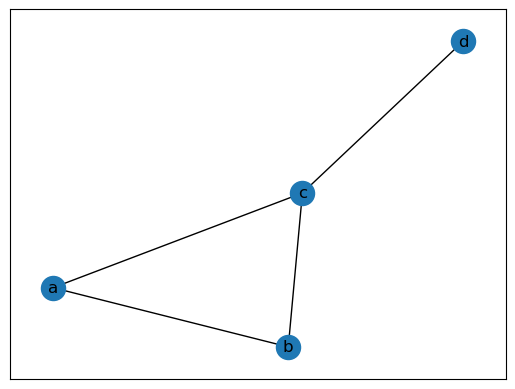

In [2]:
# create regular graph
G = nx.Graph()

# add edges
G.add_edges_from([
    ('a', 'b'),
    ('b', 'c'),
    ('a', 'c'),
    ('c', 'd')
])

# plot the graph
nx.draw_networkx(G)

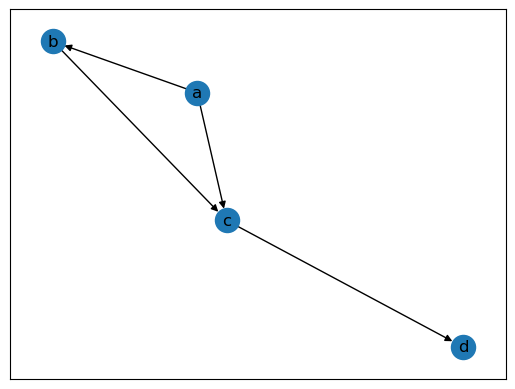

In [3]:
# create a directed graph
DG = nx.DiGraph()

# add edges
DG.add_edges_from([
    ('a', 'b'), #a to b
    ('b', 'c'), #b to c
    ('a', 'c'), #...
    ('c', 'd')
])

# plot the graph
nx.draw_networkx(DG)

{('a', 'b'): Text(0.569886680288954, -0.053321241440976386, '10'),
 ('a', 'c'): Text(0.23042556019185553, 0.14413878593557883, '15'),
 ('b', 'c'): Text(0.19968775951919074, -0.18438231811066308, '20'),
 ('c', 'd'): Text(-0.5698866802889537, 0.05332124144097655, '30')}

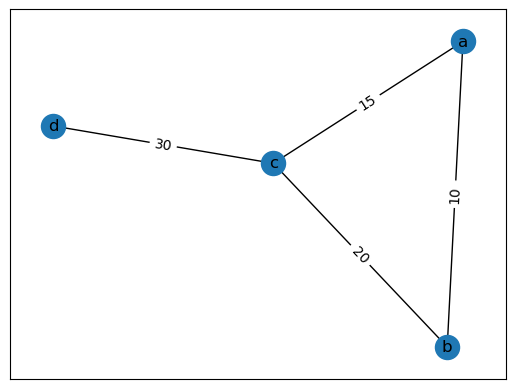

In [4]:
# create graph with edge weight
WG = nx.Graph()

# add edges
WG.add_edges_from([
    ('a', 'b', {'weight': 10}),
    ('b', 'c', {'weight': 20}),
    ('a', 'c', {'weight': 15}),
    ('c', 'd', {'weight': 30})
])

# get edge weight label
labels = nx.get_edge_attributes(WG, "weight")

# plot graph with edge weight
# 1) draw the graph, note the random seed
nx.draw_networkx(
    WG,
    pos=nx.spring_layout(G, seed=42)
)

# 2) draw the label, note the random seed
nx.draw_networkx_edge_labels(
    WG,
    pos=nx.spring_layout(G, seed=42),
    edge_labels=labels
)

# graph properties

Graph is connected? True


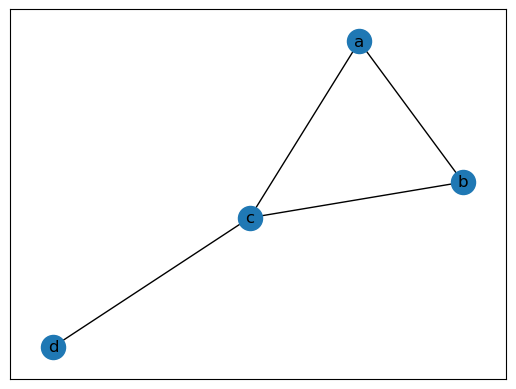

In [5]:
# create connected graph
G = nx.Graph()
G.add_edges_from([
    ('a', 'b'),
    ('b', 'c'),
    ('a', 'c'),
    ('c', 'd')
])
# check if graph is connected
print(f"Graph is connected? {nx.is_connected(G)}")
# plot the graph
nx.draw_networkx(G)

Graph is connected? False


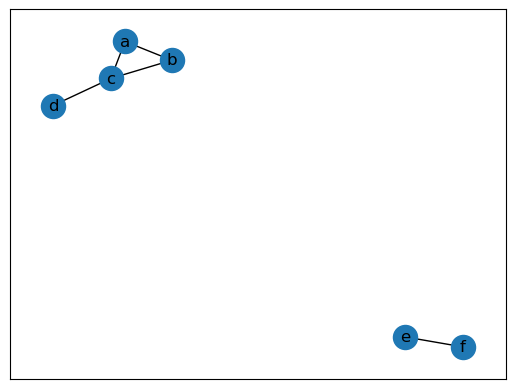

In [6]:
# create a disconnected graph
dis_G = nx.Graph()
dis_G.add_edges_from([
    ('a', 'b'),
    ('b', 'c'),
    ('a', 'c'),
    ('c', 'd'),
    ('e', 'f')
])
# check if graph is connected
print(f"Graph is connected? {nx.is_connected(dis_G)}")
# plot the graph
nx.draw_networkx(dis_G)

In [7]:
# node degree is the number of connection the node has with other nodes in the graph
# let's check the degree of node 'a' in graph G
print(f"Degree of node 'a' is: {G.degree['a']}")

Degree of node 'a' is: 2


In [8]:
# for directed graphs, there is in- and out-degree of a node, which is the connection
# pointing inward- and outward- a node.
print(f"In-degree of 'c' is: {DG.in_degree['c']}")
print(f"Out-degree of node 'c' is: {DG.out_degree['c']}")

In-degree of 'c' is: 2
Out-degree of node 'c' is: 1


In [9]:
# degree of centrality is the degree of nodes normalized by n-1 where n is the number of nodes
print(f"compute the degree centrality of node 'a': {G.degree['a'] / (G.number_of_nodes() -1)}")

# one can print whole graph degree centrality
print(f"degree centrality of whole graph G: {nx.degree_centrality(G)}")


compute the degree centrality of node 'a': 0.6666666666666666
degree centrality of whole graph G: {'a': 0.6666666666666666, 'b': 0.6666666666666666, 'c': 1.0, 'd': 0.3333333333333333}


In [10]:
# closeness centrality
nx.closeness_centrality(G)

{'a': 0.75, 'b': 0.75, 'c': 1.0, 'd': 0.6}

In [11]:
# betweeness centrality
nx.betweenness_centrality(G)

{'a': 0.0, 'b': 0.0, 'c': 0.6666666666666666, 'd': 0.0}

In [12]:
# Adjacent matrix
A = nx.adjacency_matrix(G)
A.todense()

array([[0, 1, 1, 0],
       [1, 0, 1, 0],
       [1, 1, 0, 1],
       [0, 0, 1, 0]])

# graph algorithms

True

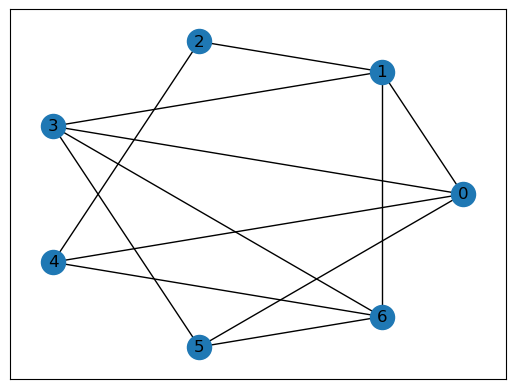

In [13]:
# create a binomial graph
G = nx.erdos_renyi_graph(
    n=7, # number of nodes
    p = 0.5, # probability of node connection
    directed=False # not a connected graph
)

# plot the graph
nx.draw_networkx(
    G,
    pos=nx.circular_layout(G)
)

# check if the graph is connected
nx.is_connected(G)

In [14]:
# breadth-first search traverses all neighboring node before moving to the next level
def bfs(G: nx.Graph(), node: int):
    visited, queue = [node], [node]
    while queue:
        node = queue.pop(0)
        for neighbor in G[node]:
            if neighbor not in visited:
                visited.append(neighbor)
                queue.append(neighbor)
    return visited
bfs(G, 1)

[1, 0, 2, 3, 6, 4, 5]

In [15]:
# depth first search

def dfs(G: nx.Graph(), node: int, visited=[]):
    if node not in visited:
        visited.append(node)
        for neighbor in G[node]:
            visited = dfs(G=G, node=neighbor,visited=visited)
    return visited

dfs(G=G, node=1)

[1, 0, 3, 5, 6, 4, 2]